In [ ]:
import tensorflow as tf
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!pip install wget

In [ ]:
import wget as wg
link = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/February/5898cd6f_traffic-signs-data/traffic-signs-data.zip'
wg.download(link, '/content/gdrive/MyDrive/NhanDienBienBao/')

'/content/gdrive/MyDrive/NhanDienBienBao//traffic-signs-data (1).zip'

In [1]:
%cd SwitchFrequencyAnalysis

[Errno 2] No such file or directory: 'SwitchFrequencyAnalysis'
/content


In [2]:
pwd

'/content'

In [ ]:
# giai nen file zip

!unzip -q '/content/gdrive/MyDrive/NhanDienBienBao/traffic-signs-data.zip' -d $data

replace /content/gdrive/MyDrive/NhanDienBienBao/test.p? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
data = '/content/gdrive/MyDrive/NhanDienBienBao/'
train_link = data + 'train.p'
valid_link = data + 'valid.p'
test_link = data + 'test.p'

In [ ]:
import pickle
with open(train_link, mode='rb') as f:
  train = pickle.load(f)
with open(valid_link, mode='rb') as f:
  valid = pickle.load(f)
with open(test_link, mode='rb') as f:
  test = pickle.load(f)

41

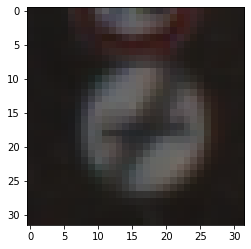

In [ ]:
trainX = train['features']
trainY = train['labels']
import matplotlib.pyplot as plt
plt.imshow(trainX[0])
trainY[0]

In [ ]:
classNames = {0: 'Speed limit (20km/h)',
 1: 'Speed limit (30km/h)',
 2: 'Speed limit (50km/h)',
 3: 'Speed limit (60km/h)',
 4: 'Speed limit (70km/h)',
 5: 'Speed limit (80km/h)',
 6: 'End of speed limit (80km/h)',
 7: 'Speed limit (100km/h)',
 8: 'Speed limit (120km/h)',
 9: 'No passing',
 10: 'No passing for vehicles over 3.5 metric tons',
 11: 'Right-of-way at the next intersection',
 12: 'Priority road',
 13: 'Yield',
 14: 'Stop',
 15: 'No vehicles',
 16: 'Vehicles over 3.5 metric tons prohibited',
 17: 'No entry',
 18: 'General caution',
 19: 'Dangerous curve to the left',
 20: 'Dangerous curve to the right',
 21: 'Double curve',
 22: 'Bumpy road',
 23: 'Slippery road',
 24: 'Road narrows on the right',
 25: 'Road work',
 26: 'Traffic signals',
 27: 'Pedestrians',
 28: 'Children crossing',
 29: 'Bicycles crossing',
 30: 'Beware of ice/snow',
 31: 'Wild animals crossing',
 32: 'End of all speed and passing limits',
 33: 'Turn right ahead',
 34: 'Turn left ahead',
 35: 'Ahead only',
 36: 'Go straight or right',
 37: 'Go straight or left',
 38: 'Keep right',
 39: 'Keep left',
 40: 'Roundabout mandatory',
 41: 'End of no passing',
 42: 'End of no passing by vehicles over 3.5 metric tons'}


In [ ]:
classNames[trainY[0]]

'End of no passing'

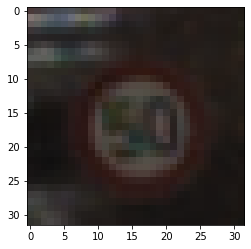

In [ ]:
from sklearn.utils import shuffle
trainX, trainY = shuffle(trainX, trainY)
plt.imshow(trainX[0])

In [ ]:
validX = valid['features']
validY = valid['labels']
testX = test['features']
testY = test['labels']

# scaler
trainX = trainX.astype('float') / 255.0
validX = validX.astype('float') / 255.0
testX = testX.astype('float') / 255.0

In [ ]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
validY = lb.fit_transform(validY)
validY[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [ ]:
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import BatchNormalization, AveragePooling2D, Conv2D, Flatten, Dense, MaxPooling2D, Activation, concatenate, Dropout, Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD

In [ ]:
 model = Sequential()
 shape = (32, 32, 3)
 classes = 43

 model.add(Conv2D(32, (3, 3), padding='same', input_shape = shape))
 model.add(Activation('relu'))
 model.add(BatchNormalization())#chuan hoa du lieu cho sai khac voi du lieu ban dau khong qua nhieu

 model.add(Conv2D(32, (3, 3), padding='same'))
 model.add(Activation('relu'))
 model.add(BatchNormalization())

 model.add(MaxPooling2D((2,2))) # trich xuat dac trung lon nhat

 model.add(Conv2D(64, (3, 3), padding='same'))
 model.add(Activation('relu'))
 model.add(BatchNormalization())#chuan hoa du lieu cho sai khac voi du lieu ban dau khong qua nhieu

 model.add(Conv2D(64, (3, 3), padding='same'))
 model.add(Activation('relu'))
 model.add(BatchNormalization())

 model.add(MaxPooling2D((2,2))) # trich xuat dac trung lon nhat

 # fully connected to classify

 model.add(Flatten())
 model.add(Dense(512, activation='relu'))
 model.add(BatchNormalization())
 model.add(Dense(classes, activation='softmax'))

 model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_26 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
activation_25 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_28 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_26 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_29 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 16, 16, 32)       

In [ ]:
aug = ImageDataGenerator(rotation_range=0.18, zoom_range=0.15, width_shift_range=0.2, height_shift_range=0.2, horizontal_flip=True)

In [ ]:
learning_rate = 0.01
epochs = 10
# moi epoch chay nhieu step, moi step chay qua mot phan data
# goi la batch_size
batch_size = 64
opt = SGD(learning_rate=learning_rate, momentum=0.9)
model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=["accuracy"])
trainX.shape

(34799, 32, 32, 3)

In [ ]:
print("Start training")
H = model.fit_generator(aug.flow(trainX, trainY, batch_size=batch_size), validation_data=(validX, validY), steps_per_epoch=trainX.shape[0]//batch_size, epochs=epochs, verbose=1)

Start training
Epoch 1/10
  1/543 [..............................] - ETA: 36s - loss: 0.0838 - accuracy: 0.9688

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


543/543 [==============================] - 30s 55ms/step - loss: 0.1228 - accuracy: 0.9609 - val_loss: 0.5787 - val_accuracy: 0.8540
Epoch 2/10
543/543 [==============================] - 30s 56ms/step - loss: 0.0952 - accuracy: 0.9692 - val_loss: 0.5462 - val_accuracy: 0.8633
Epoch 3/10
543/543 [==============================] - 31s 57ms/step - loss: 0.0834 - accuracy: 0.9736 - val_loss: 0.6116 - val_accuracy: 0.8605
Epoch 4/10
543/543 [==============================] - 31s 57ms/step - loss: 0.0612 - accuracy: 0.9811 - val_loss: 0.4718 - val_accuracy: 0.8882
Epoch 5/10
543/543 [==============================] - 31s 58ms/step - loss: 0.0582 - accuracy: 0.9810 - val_loss: 0.5593 - val_accuracy: 0.8624
Epoch 6/10
543/543 [==============================] - 31s 57ms/step - loss: 0.0462 - accuracy: 0.9855 - val_loss: 0.4913 - val_accuracy: 0.8871
Epoch 7/10
543/543 [==============================] - 31s 56ms/step - loss: 0.0458 - accuracy: 0.9849 - val_loss: 0.6061 - val_accuracy: 0.8499
Epo

In [ ]:
model.save('/content/gdrive/MyDrive/NhanDienBienBao/tu.h5')

In [ ]:
model = tf.keras.models.load_model('/content/gdrive/MyDrive/NhanDienBienBao/tu.h5')

In [ ]:
y_pred = model.predict(testX[15:16])

In [ ]:
import numpy as np

In [ ]:
classNames[np.argmax(y_pred)]

'No passing'

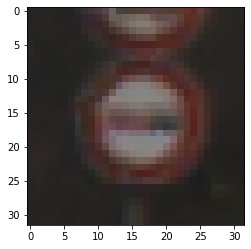

In [ ]:
plt.imshow(test['features'][15])